In [33]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from string import punctuation

### Drop

In [51]:
# A list to add columns we are not going to use
dropCols = []

### Formation

In [2]:
df = pd.read_csv('../data/train.csv')

/Users/shozendan/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.OffenseFormation.unique()

array(['SHOTGUN', 'SINGLEBACK', 'JUMBO', 'PISTOL', 'I_FORM', 'ACE',
       'WILDCAT', nan, 'EMPTY'], dtype=object)

In [5]:
formationMap = {} # map for the formation
for formation in df.OffenseFormation.dropna().unique():
    mean = df[df.OffenseFormation == formation]['Yards'].mean()
    norm = (mean - df.Yards.mean()) / df.Yards.std()
    formationMap[formation] = norm

In [8]:
formationMap

{'SHOTGUN': 0.045963148916462235,
 'SINGLEBACK': 0.0015194456415177967,
 'JUMBO': -0.38160855326070875,
 'PISTOL': 0.013366072098892314,
 'I_FORM': -0.02951017150968959,
 'ACE': -0.03299081321268627,
 'WILDCAT': 0.0015362930633368854,
 'EMPTY': 0.1291364684312485}

In [9]:
df['OffenseFormation'].map(formationMap)

0         0.045963
1         0.045963
2         0.045963
3         0.045963
4         0.045963
            ...   
509757    0.001519
509758    0.001519
509759    0.001519
509760    0.001519
509761    0.001519
Name: OffenseFormation, Length: 509762, dtype: float64

In [10]:
# implementing the function
def cleanOffenseFormation():
    """
    This is a function for cleaning the Offense Formation column.
    It will find the mean Yards for and normalize it.
    """
    
    formationMap = {}
    for f in df.OffenseFormation.dropna().unique():
        mean = df[df.OffenseFormation == f]['Yards'].mean()
        norm = (mean - df.Yards.mean()) / df.Yards.std()
        formationMap[f] = norm
    
    df['OffenseFormation'] = df['OffenseFormation'].map(formationMap)

### Weather

In [11]:
df.GameWeather.unique()

array(['Clear and warm', 'Sun & clouds', 'Sunny', 'Controlled Climate',
       'Mostly Sunny', 'Clear', nan, 'Indoor', 'Mostly Cloudy',
       'Mostly Coudy', 'Partly sunny', 'Partly Cloudy', 'Cloudy',
       'Sunny, highs to upper 80s', 'Indoors', 'Light Rain', 'Showers',
       'Partly cloudy', 'Partly Sunny', '30% Chance of Rain',
       'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
       'Rain', 'Cloudy, fog started developing in 2nd quarter', 'Coudy',
       'Rain likely, temps in low 40s.', 'Cold', 'N/A (Indoors)',
       'Clear skies', 'cloudy', 'Fair', 'Mostly cloudy',
       'Cloudy, chance of rain', 'Heavy lake effect snow', 'Party Cloudy',
       'Cloudy, light snow accumulating 1-3"', 'Cloudy and cold', 'Snow',
       'Hazy', 'Scattered Showers', 'Cloudy and Cool', 'N/A Indoor',
       'Rain Chance 40%', 'Clear and sunny', 'Mostly sunny',
       'Sunny and warm', 'Partly clear', 'Cloudy, 50% change of rain',
       'Clear and Sunny', '

In [21]:
def cleanGameWeather(x):
        x = str(x).lower()
        if 'sunny' in x or 'clear' in x or 'fair' in x:
            return 'sunny'
        elif 'cloud' in x or 'coudy' in x or 'clouidy' in x or 'hazy' in x or 'sun & clouds' in x or 'overcast' in x:
            return 'cloudy'
        elif 'rain' in x or 'shower' in x or 'rainy' in x:
            return 'rainy'
        elif 'controlled climate' in x or 'indoor' in x:
            return 'indoor'
        elif 'snow' in x:
            return 'snowy'
        return None

In [23]:
df['GameWeather'] = df['GameWeather'].apply(cleanGameWeather)

In [26]:
def mapGameWeather():
    gameWeatherMap = {}
    for w in df.GameWeather.dropna().unique():
        mean = df[df.GameWeather == w]['Yards'].mean()
        norm = (mean - df.Yards.mean()) / df.Yards.std()
        gameWeatherMap[w] = norm
    df['GameWeather'] = df['GameWeather'].map(gameWeatherMap)

### Wind Direction

In [29]:
df.WindDirection.unique()

array(['SW', 'NNE', 'SE', 'East', nan, 'NE', 'North', 'S', 'Northwest',
       'SouthWest', 'ENE', 'ESE', 'SSW', 'NW', 'Northeast', 'From S', 'W',
       'South', 'West-Southwest', 'E', '13', 'N', 'NNW',
       'South Southeast', 'SSE', 'West', 'WSW', 'From SW', 'WNW', 's',
       'NorthEast', 'from W', 'W-NW', 'South Southwest', 'Southeast',
       'From WSW', 'West Northwest', 'Calm', 'From SSE', 'From W',
       'East North East', 'From ESE', 'EAST', 'East Southeast',
       'From SSW', '8', 'North East', 'Southwest', 'North/Northwest',
       'From NNE', '1', 'N-NE', 'W-SW', 'From NNW'], dtype=object)

In [31]:
def cleanWindDirection(txt):
        if pd.isna(txt):
            return np.nan
        txt = txt.lower()
        txt = ''.join([c for c in txt if c not in punctuation])
        txt = txt.replace('from', '')
        txt = txt.replace(' ', '')
        txt = txt.replace('north', 'n')
        txt = txt.replace('south', 's')
        txt = txt.replace('west', 'w')
        txt = txt.replace('east', 'e')
        return txt

In [34]:
df['WindDirection'] = df['WindDirection'].apply(cleanWindDirection)

In [35]:
df.WindDirection.unique()

array(['sw', 'nne', 'se', 'e', nan, 'ne', 'n', 's', 'nw', 'ene', 'ese',
       'ssw', 'w', 'wsw', '13', 'nnw', 'sse', 'wnw', 'calm', '8', '1'],
      dtype=object)

In [36]:
def mapWindDirection(txt):
    windDirectionMap = {
        'n': 0,'nne': 1/8,'nen': 1/8,'ne': 2/8,
        'ene': 3/8,'nee': 3/8,'e': 4/8,'ese': 5/8,
        'see': 5/8,'se': 6/8,'ses': 7/8,'sse': 7/8,
        's': 1,'ssw': 9/8,'sws': 9/8,'sw': 10/8,
        'sww': 11/8,'wsw': 11/8,'w': 12/8,'wnw': 13/8,
        'nw': 14/8,'nwn': 15/8,'nnw': 15/8
    }
    try:
        return windDirectionMap[txt]
    except:
        return np.nan

In [37]:
df['WindDirection'] = df['WindDirection'].apply(mapWindDirection)

### Stadium Type

In [39]:
df.StadiumType.unique()

array(['Outdoor', 'Outdoors', 'Indoors', 'Retractable Roof', 'Indoor',
       'Retr. Roof-Closed', 'Open', nan, 'Indoor, Open Roof',
       'Retr. Roof - Closed', 'Outddors', 'Dome', 'Domed, closed',
       'Indoor, Roof Closed', 'Retr. Roof Closed',
       'Outdoor Retr Roof-Open', 'Closed Dome', 'Oudoor', 'Ourdoor',
       'Dome, closed', 'Retr. Roof-Open', 'Heinz Field', 'Outdor',
       'Retr. Roof - Open', 'Domed, Open', 'Domed, open', 'Cloudy',
       'Bowl', 'Outside', 'Domed'], dtype=object)

In [41]:
def cleanStadiumType(txt):  # Fixes the typo
        if pd.isna(txt):
            return np.nan
        txt = txt.lower()
        txt = ''.join([c for c in txt if c not in punctuation])
        txt = re.sub(' +', ' ', txt)
        txt = txt.strip()
        txt = txt.replace('outside', 'outdoor')
        txt = txt.replace('outdor', 'outdoor')
        txt = txt.replace('outddors', 'outdoor')
        txt = txt.replace('outdoors', 'outdoor')
        txt = txt.replace('oudoor', 'outdoor')
        txt = txt.replace('indoors', 'indoor')
        txt = txt.replace('ourdoor', 'outdoor')
        txt = txt.replace('retractable', 'rtr.')
        return txt

In [42]:
df['StadiumType'] = df['StadiumType'].apply(cleanStadiumType)

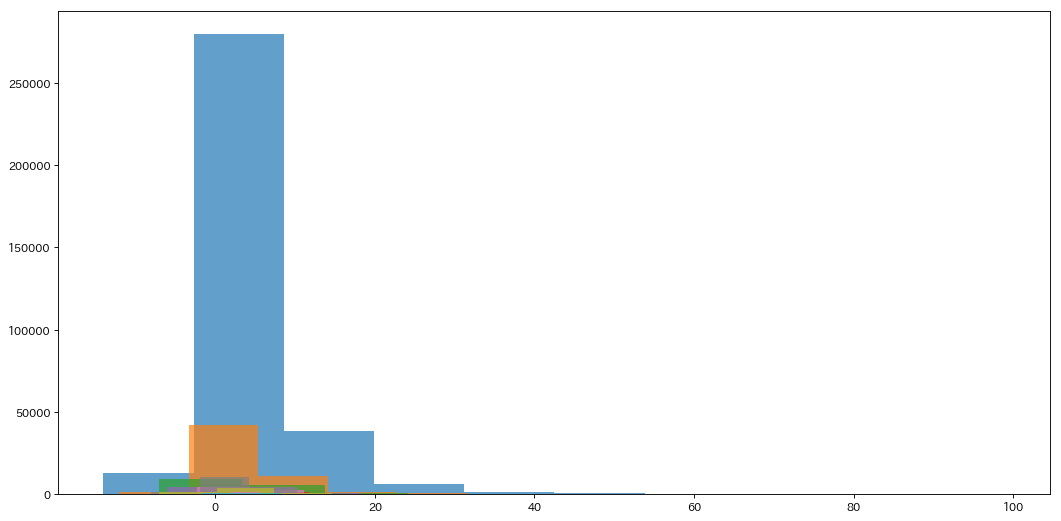

In [45]:
plt.figure(figsize=(16,8), dpi=80)
for st in df.StadiumType.dropna().unique():
    plt.hist(df[df.StadiumType == st]['Yards'], bins=10, alpha=.7)
plt.show()

In [46]:
def cleanStadiumType2(self, txt):
        if pd.isna(txt):
            return np.nan
        if 'outdoor' in txt or 'open' in txt:
            return 1
        if 'indoor' in txt or 'closed' in txt:
            return 0
        return np.nan

### Location

In [49]:
df.Location.unique()

array(['Foxborough, MA', 'Orchard Park NY', 'Chicago. IL',
       'Cincinnati, Ohio', 'Cleveland, Ohio', 'Detroit, MI',
       'Houston, Texas', 'Nashville, TN', 'Landover, MD',
       'Los Angeles, Calif.', 'Green Bay, WI', 'Santa Clara, CA',
       'Arlington, Texas', 'Minneapolis, MN', 'Denver, CO',
       'Baltimore, Md.', 'Charlotte, North Carolina',
       'Indianapolis, Ind.', 'Jacksonville, FL', 'Kansas City, MO',
       'New Orleans, LA', 'Pittsburgh', 'Tampa, FL', 'Carson, CA',
       'Oakland, CA', 'Seattle, WA', 'Atlanta, GA', 'East Rutherford, NJ',
       'London, England', 'Chicago, IL', 'Detroit', 'Philadelphia, Pa.',
       'Glendale, AZ', 'Cleveland, OH', 'Foxborough, Ma',
       'E. Rutherford, NJ', 'Miami Gardens, Fla.', 'Houston, TX',
       'London', 'New Orleans, La.', 'Mexico City', 'Baltimore, Maryland',
       'Arlington, TX', 'Jacksonville, Fl', 'Jacksonville, Florida',
       'Pittsburgh, PA', 'Charlotte, NC', 'Cleveland,Ohio',
       'East Rutherford, N.J.',

In [52]:
dropCols.append('Location')